# Lab3: 利用逻辑回归对Iris数据集进行分类

## 1. 加载鸢尾花数据集并划分训练/测试数据

In [209]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y = True) # X是特征组，Y是标签组
X_train, X_test, Y_train, Y_test = train_test_split(X[:, :2],y,test_size = 0.3, random_state = 1279) # 划分数据集


## 2. 训练逻辑回归模型

In [210]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from time import time

def iris_classifier(*, penalty = 'l2', solver = 'liblinear', random = 0, l1_ratio = None): # 分类器模型
    return Pipeline([
        ("std_scaler", StandardScaler(copy = False)), # 特征值无偏化
        ("cls", LogisticRegression(penalty=penalty, solver=solver, random_state=random, l1_ratio=l1_ratio, multi_class='multinomial'))
    ])

classifier = iris_classifier(penalty='l2', solver ='lbfgs') # 采用L2正规化和lbfgs(拟牛顿)算法进行逻辑回归
t1 = time()
classifier.fit(X_train, Y_train) # 训练
print('training time: %.1f ms' % ((time()-t1)*1000))
classifier.score(X_test, Y_test) # 评估 -- 用训练好的模型来预测测试集有0.73的正确率

training time: 41.9 ms


0.7333333333333333

## 3. 利用matplotlib进行数据可视化

1. 散点图

2. 绘制决策边界/决策区域

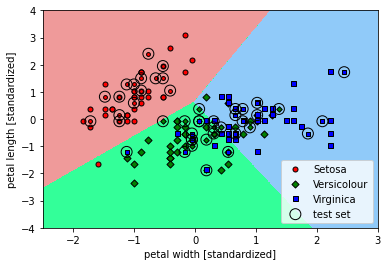

In [211]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as c_map
import numpy as np

color_set = ['r','g','b'] # 数据点的颜色

# 绘制数据点
def scatter(colorSet: list, labelSet: list, markerSet: list):
    for i in range(3): # 绘制数据点
        plt.scatter(X_train[Y_train==i,0], X_train[Y_train==i, 1], color = colorSet[i], edgecolors='black', label = labelSet[i], marker = markerSet[i], s = 25)
        plt.scatter(X_test[Y_test==i,0], X_test[Y_test==i, 1], color = colorSet[i], edgecolors='black', marker = markerSet[i], s = 15)
    plt.scatter(X_test[:, 0], X_test[:,1], color ='', edgecolors='black', label = labelSet[-1], marker = 'o', s = 120) # 圈出测试集

# 绘制决策区域
def plot_boundary(model, axis, colorSet):
    x0, x1 = np.meshgrid( # 绘图区域设置
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )

    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_pre = model.predict(x_new).reshape(x0.shape)
    cus = c_map(colorSet) # 颜色填充设置
    plt.contourf(x0, x1, y_pre, cmap = cus)


plot_boundary(model = classifier[1], axis = [-2.5,3,-4,4], colorSet = ["#EF9A9A","#33FF99","#90CAF9"])
scatter(colorSet = color_set, labelSet=['Setosa','Versicolour','Virginica', 'test set'], markerSet=['o','D',','])
plt.xlabel('petal width [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc = 'lower right')

## sklearn中的其它分类器

- linear_model.SGDClassfier分类器，可实现线性SVM和逻辑回归
- svm.NuSVC分类器，实现非线性SVM
- tree.DecisionTreeClassifier分类器，实现决策树
- ensemble.RandomForestClassifier分类器，实现随机森林

In [212]:
# 建立分类器模型
from sklearn.linear_model import SGDClassifier # 随机梯度下降
from sklearn.svm import NuSVC # 可选数量的支撑向量
from sklearn.tree import DecisionTreeClassifier as DTC # 决策树
from sklearn.ensemble import RandomForestClassifier as RFC # 随机森林

lsvm = Pipeline([    # 线性SVM模型
        ("std_scaler", StandardScaler(copy = False)), # 特征值无偏化
        ("cls", SGDClassifier(penalty='l2', loss='squared_hinge', random_state=0, 
                eta0 = 0.0, learning_rate='optimal', alpha = 0.0001))
])
svm = Pipeline([    # 非线性SVM模型
        ("std_scaler", StandardScaler(copy = False)), # 特征值无偏化
        ("NuSVC", NuSVC(nu = 0.37, decision_function_shape = 'ovo'))
])
dtc = Pipeline([    # 决策树模型
        ("std_scaler", StandardScaler(copy = False)), # 特征值无偏化
        ("decision_tree", DTC(criterion = 'gini'))
])
rfc = Pipeline([    # 随机森林
        ("std_scaler", StandardScaler(copy = False)), # 特征值无偏化
        ("rnd_forest", RFC(n_estimators=20, criterion = 'gini'))
])

training time: 9.0 ms


0.7777777777777778

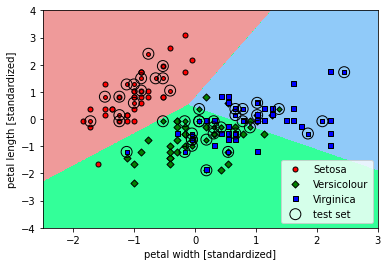

In [213]:
t1 = time()
lsvm.fit(X_train, Y_train)
print('training time: %.1f ms' % ((time()-t1)*1000))
plot_boundary(model = lsvm[1], axis = [-2.5,3,-4,4], colorSet = ["#EF9A9A","#33FF99","#90CAF9"])
scatter(colorSet = color_set, labelSet=['Setosa','Versicolour','Virginica', 'test set'], markerSet=['o','D',','])
plt.xlabel('petal width [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc = 'lower right')
lsvm.score(X_test, Y_test) # 评估 -- 用训练好的模型来预测测试集有0.78的正确率

training time: 10.0 ms


0.6888888888888889

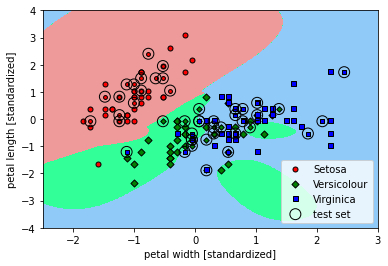

In [214]:
t1 = time()
svm.fit(X_train, Y_train)
print('training time: %.1f ms' % ((time()-t1)*1000))
plot_boundary(model = svm[1], axis = [-2.5,3,-4,4], colorSet = ["#EF9A9A","#33FF99","#90CAF9"])
scatter(colorSet = color_set, labelSet=['Setosa','Versicolour','Virginica', 'test set'], markerSet=['o','D',','])
plt.xlabel('petal width [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc = 'lower right')
svm.score(X_test, Y_test) # 评估 -- 用训练好的模型来预测测试集有0.69的正确率

training time: 2.7 ms


0.6888888888888889

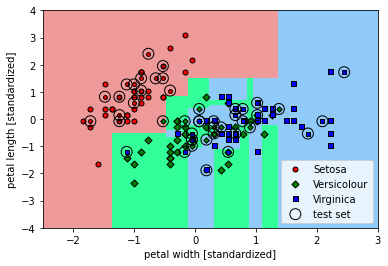

In [215]:
t1 = time()
dtc.fit(X_train, Y_train)
print('training time: %.1f ms' % ((time()-t1)*1000))
plot_boundary(model = dtc[1], axis = [-2.5,3,-4,4], colorSet = ["#EF9A9A","#33FF99","#90CAF9"])
scatter(colorSet = color_set, labelSet=['Setosa','Versicolour','Virginica', 'test set'], markerSet=['o','D',','])
plt.xlabel('petal width [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc = 'lower right')
dtc.score(X_test, Y_test) # 评估 -- 用训练好的模型来预测测试集有0.69的正确率

training time: 108.4 ms


0.7111111111111111

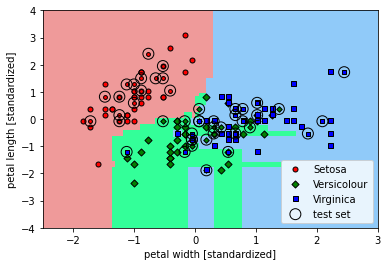

In [216]:
t1 = time()
rfc.fit(X_train, Y_train)
print('training time: %.1f ms' % ((time()-t1)*1000))
plot_boundary(model = rfc[1], axis = [-2.5,3,-4,4], colorSet = ["#EF9A9A","#33FF99","#90CAF9"])
scatter(colorSet = color_set, labelSet=['Setosa','Versicolour','Virginica', 'test set'], markerSet=['o','D',','])
plt.xlabel('petal width [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc = 'lower right')
rfc.score(X_test, Y_test) # 评估 -- 用训练好的模型来预测测试集有0.71的正确率

- ``线性svm``在这个数据集上拟合得比逻辑回归更好
- ``随机森林``的准确度同逻辑回归相近，但是耗时相当长
- ``决策树``和``非线性svm``拟合稍逊于逻辑回归

决策树方法是一个稳定的方法，通过增加树的层数可以较为方便得处理多分类问题

随机森林是决策树的集成学习方案，有比决策树更优的分类效果，但是训练时间和运行速度都较慢